# California housing

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
ls sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [67]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')

In [68]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [69]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [70]:
train.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

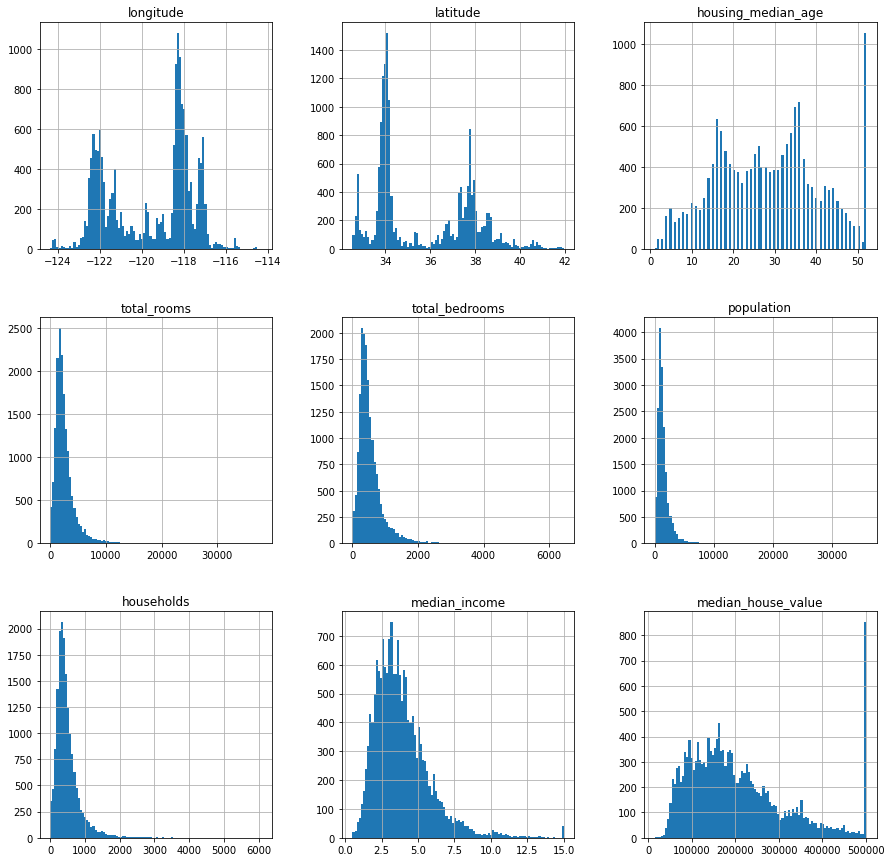

In [71]:
train.hist(figsize=(15,15), bins=100);

In [72]:
train.median_house_value.max()

500001.0

In [73]:
train.housing_median_age.max()

52.0

In [74]:
# some filtering
train = train[(train.median_house_value != train.median_house_value.max())
& (train.housing_median_age != train.housing_median_age.max())
]

In [75]:
len(train)

15282

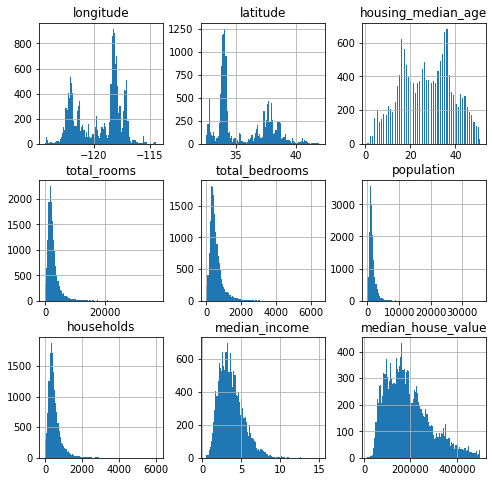

In [76]:
train.hist(figsize=(8,8), bins=100);

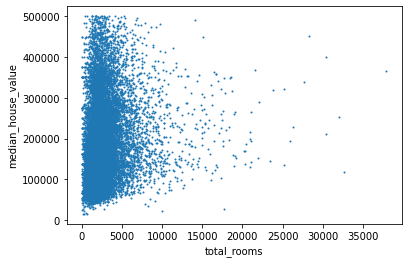

In [77]:
train.plot(x='total_rooms', y='median_house_value', kind='scatter',s=1)

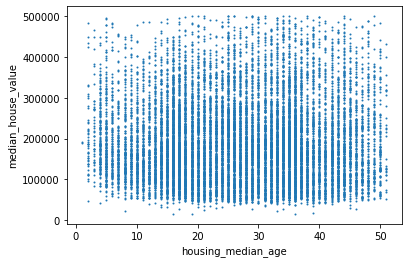

In [78]:
train.plot(x='housing_median_age', y='median_house_value', kind='scatter',s=1)

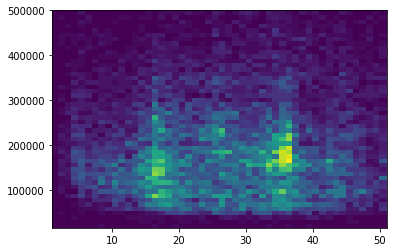

In [79]:
plt.hist2d(train.housing_median_age, train.median_house_value, bins=50);

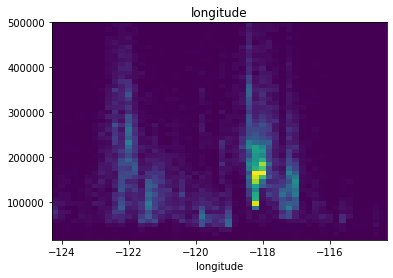

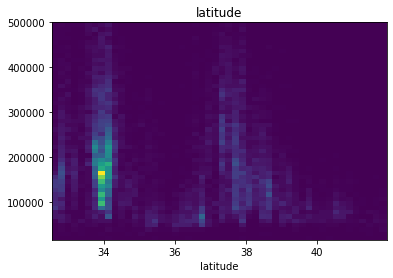

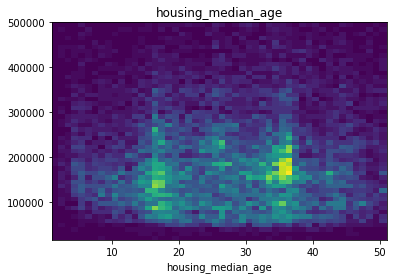

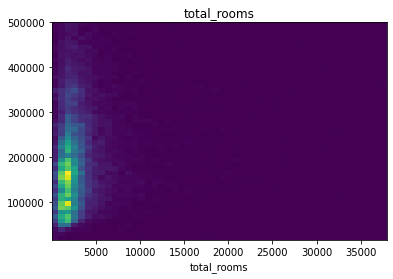

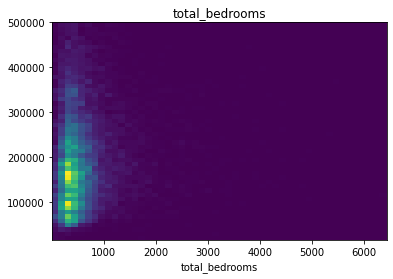

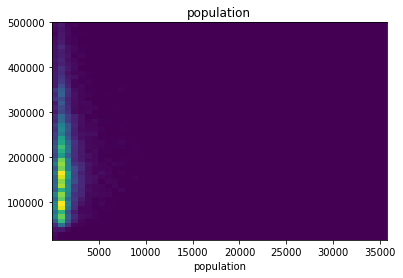

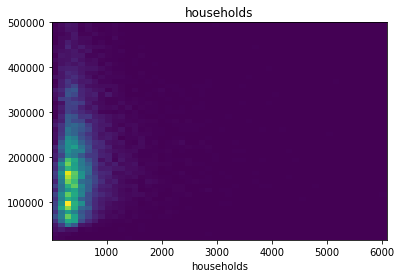

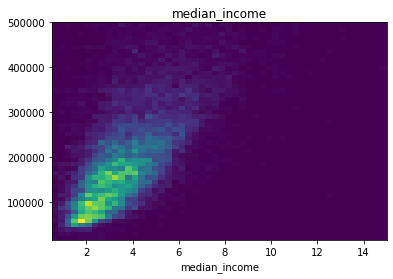

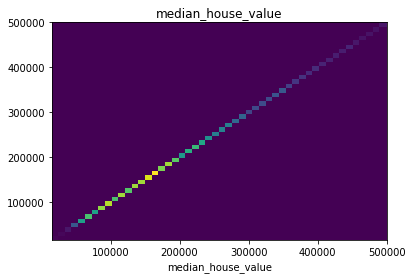

In [80]:
for col in train.columns:
  plt.hist2d(train[col], train.median_house_value, bins=50);
  plt.title(col)
  plt.xlabel(col)
  plt.show()

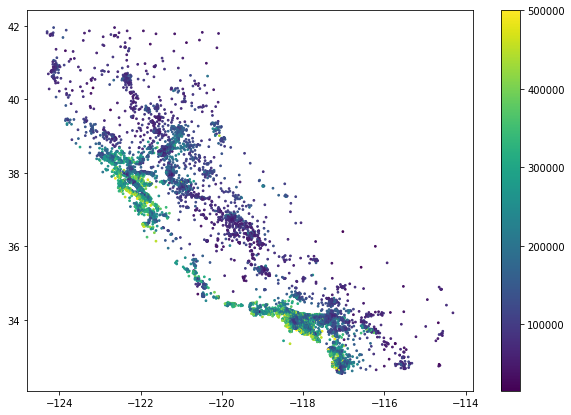

In [81]:
# California State
plt.figure(figsize=(10,7))
plt.scatter(train.longitude, train.latitude, s=3, c=train.median_house_value);
plt.colorbar()

In [82]:
train.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

## Machine learning

### sciki-learn

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [83]:
import sklearn

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
## 1. Create the training data
# X = ?
# y = ? 

In [86]:
predict_feature = 'median_house_value'
y = train[predict_feature]
y.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [87]:
training_features = list(train.columns)
training_features.remove(predict_feature)
training_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [88]:
X = train[training_features]
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [142]:
regressor = RandomForestRegressor()

In [143]:
regressor.fit(X, y)

RandomForestRegressor()

In [144]:
sample = train.iloc[34:36]
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
34,-115.40,32.70,19.0,583.0,113.0,531.0,134.0,1.6838,95800.0
35,-115.41,32.99,29.0,1141.0,220.0,684.0,194.0,3.4038,107800.0


In [145]:
x_test = sample[training_features]

In [146]:
regressor.predict(x_test)

array([87219., 97513.])

In [147]:
y_predict = regressor.predict(X)
y_predict

array([ 67582.,  74440.,  78191., ...,  79201., 111408.,  82995.])

In [148]:
def error(y_true, y_predict):
  error = np.abs(y_true - y_predict)/y * 100
  return error

def plot_error(error, ax=None, **kwargs):
  ax = plt.gca() if ax is None else ax
  kwargs.setdefault('bins', 100)
  kwargs.setdefault('range', (0,50))
  ax.hist(error, **kwargs)
  ax.set_xlabel('error in %')
  return ax

Text(0.5, 1.0, 'training error')

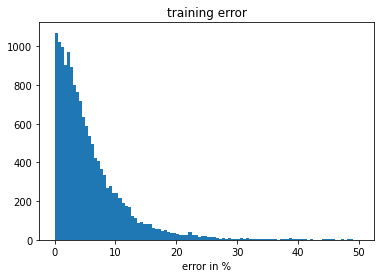

In [149]:
training_error = error(y, y_predict)
ax = plot_error(training_error)
ax.set_title('training error')

That was on training data, which is **not** what we want or should do.    
Let's compute the error on the test data.

In [150]:
X_test = test[training_features]
y_test = test[predict_feature]

y_predict = regressor.predict(X_test)

In [151]:
error_rf = error(y_test, y_predict)

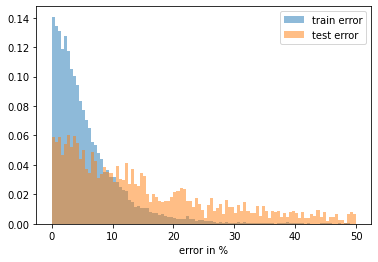

In [153]:
ax = plot_error(training_error, label='train error', density=True, alpha=0.5)
ax = plot_error(error_rf, ax=ax, label='test error', density=True, alpha=0.5)
plt.legend()

We Can see that the error on the test dataset is greater (which is expected)

In [154]:
# try with gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()

In [155]:
regressor.fit(X, y)

GradientBoostingRegressor()

In [156]:
y_predict = regressor.predict(X_test)

In [157]:
error_gdb = error(y_predict, y_test)

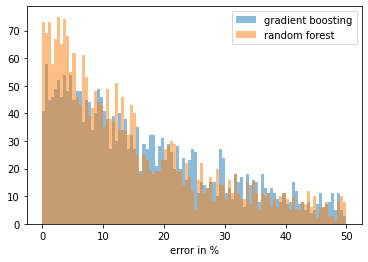

In [159]:
plot_error(error_gdb, label='gradient boosting', alpha=0.5)
plot_error(error_rf, label='random forest', alpha=0.5)
plt.legend()

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
linear_reg = LinearRegression()

In [163]:
linear_reg.fit(X, y)

LinearRegression()

In [165]:
y_predict = linear_reg.predict(X_test)

In [166]:
error_lr = error(y_test, y_predict)

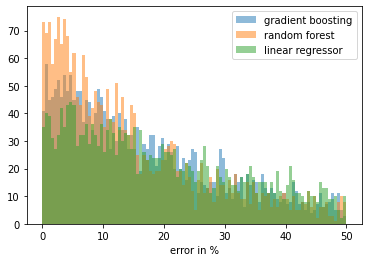

In [168]:
plot_error(error_gdb, label='gradient boosting', alpha=0.5)
plot_error(error_rf, label='random forest', alpha=0.5)
plot_error(error_lr, label='linear regressor', alpha=0.5)
plt.legend()

In [169]:
importances = regressor.feature_importances_

In [172]:
training_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [171]:
importances

array([0.18934429, 0.14731651, 0.02614436, 0.00323335, 0.02112126,
       0.02380316, 0.00969978, 0.57933729])

<BarContainer object of 8 artists>

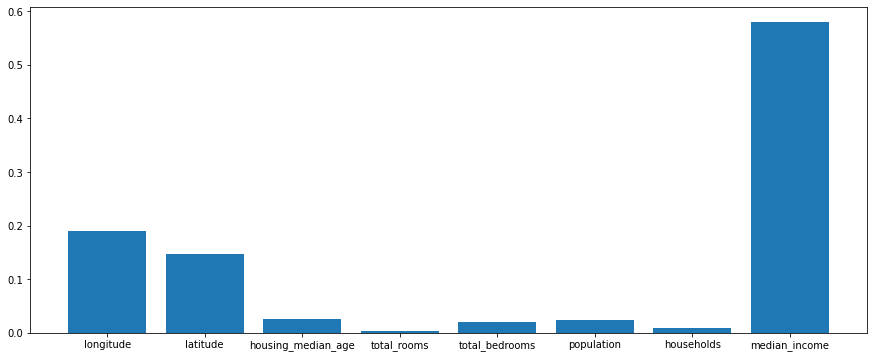

In [175]:
plt.figure(figsize=(15,6))
plt.bar(training_features, importances)